In [149]:
# 1

In [150]:
salary = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]

In [151]:
def st_dev(data_set):
    avg_val = sum(data_set) / len(data_set)
    inter_list = []
    for i in data_set:
        inter_val = (i - avg_val)**2
        inter_list.append(inter_val)
    return (sum(inter_list) / (len(data_set) - 1))**(1/2)

In [152]:
print(st_dev(salary)) #несмещённое среднее квадратичное отклонение

47.34795213553139


In [153]:
#проверка
import numpy as np
import pandas as pd
salary_pd = pd.Series(salary)
print((salary_pd.var(ddof=1))**(1/2))

47.347952135531386


In [154]:
# 2

In [155]:
def qun(data_set, q):
    sort_data_set = sorted(data_set)
    n=4
    n1=1
    if q == 25:
        n = 4
    elif q == 50:
        n = 2
    elif q == 75:
        n = 4
        n1 = 3
    l = (n1 * len(sort_data_set)) // n
    qu = sort_data_set[l] #на это число придётся квартиль
    inter_list1 = []
    inter_list2 = []
    for i in sort_data_set:
        if i <= qu:
            inter_list1.append(i)
        elif i >= qu:
            inter_list2.append(i)
    if len(data_set) % n != 0: #если нацело не делится
        inter_list2.append(qu) #добавляем элемент, по которому прошёл квартиль
#     print(inter_list1)
#     print(len(inter_list1) / len(sort_salary))
#     print(sorted(inter_list2))
#     print(len(inter_list2) / len(sort_salary))
    return(qu)

In [156]:
q1 = qun(salary, 25)
q2 = qun(salary, 50)
q3 = qun(salary, 75) 
q1, q2, q3 #квартили

(45, 70, 84)

In [157]:
IQR = q3 - q1
IQR #интерквартильный размах

39

In [158]:
bxpl1, bxpl2 = q1 - 1.5 * IQR, q3 + 1.5* IQR
bxpl1, bxpl2

(-13.5, 142.5)

In [159]:
outliers_list = []
for i in sorted(salary):
    if i < bxpl1 or i > bxpl2:
        outliers_list.append(i)
print(outliers_list) #список с выбросами                 
print(len(outliers_list)) #количество не вошедших в выборку выбросов по методике boxplot  

[150, 230]
2


In [160]:
#проверка
salary_pd.quantile([0.25, 0.5, 0.75])

0.25    45.0
0.50    70.0
0.75    84.0
dtype: float64

In [161]:
q1, q3 = salary_pd.quantile([0.25, 0.75])
iqr = q3 - q1
boxplot_range = (salary_pd.quantile(0.25) - 1.5 * iqr, salary_pd.quantile(0.75) + 1.5 * iqr)
outliers = salary_pd.loc[(salary_pd < boxplot_range[0]) | (salary_pd > boxplot_range[1])]

outliers.shape[0]

2

<AxesSubplot:>

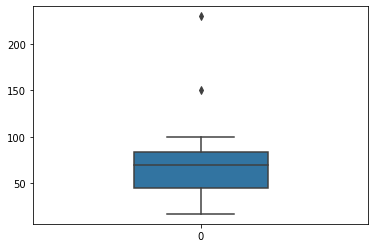

In [162]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.boxplot(data=salary_pd, width=0.4)

In [163]:
# 3

In [164]:
values = ['A', 'B', 'C']
numb = np.array([100, 90, 45])
probabilities = np.array([0.6, 0.7, 0.8])
z = pd.DataFrame({'факультет': values, 'количество':numb, 'вероятность': probabilities})
z.head(3)

,факультет,количество,вероятность
0,A,100,0.6
1,B,90,0.7
2,C,45,0.8


In [165]:
[i / sum(numb*probabilities) for i in numb*probabilities]

[0.37735849056603776, 0.3962264150943396, 0.22641509433962265]

In [166]:
#более вероятно выбрать студента из B факультета (39.6%)